<a href="https://colab.research.google.com/github/ziatdinovmax/CSSAS-DML/blob/master/1_cssas_process_labeled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-processing labeled *png* images

Prepared by Maxim Ziatdinov (October 2019)


---


This notebook converts manually labeled png files to the files ready to be used for the data augmentation procedure and also ensures that all the ellipses in the ground truth are of the same size.


---



Import modules:

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Load manually labeled data stored as png files:

(use "Upload" option in the left pane)

In [0]:
imgdata = cv2.imread('/content/3M_KCl_849.png', cv2.IMREAD_GRAYSCALE)
maskdata = cv2.imread('/content/3M_KCl_849 ground truth.png', cv2.IMREAD_GRAYSCALE)

Remove "background" in masked data and fix ellipses sizes:

In [0]:
maskdata[maskdata != 255] = 0
_, contours, _ = cv2.findContours(maskdata.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
com_arr = np.empty((0, 2))
angles = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 2:
        (com), (ma, Ma), angle = cv2.fitEllipse(cnt)
        com = np.array(com)
        com_arr = np.append(com_arr, [com], axis=0)
        angles.append(angle)

maskdata_upd = np.zeros(shape = maskdata.shape)
for i in range(com_arr.shape[0]):
    cs_x, cs_y = com_arr[i]
    ma = 2 # specify minor axis of each ellipse
    Ma = 12 # specif major axis of each ellipse
    angle = angles[i]
    maskdata_upd=cv2.ellipse(maskdata_upd, 
                             center= (int(cs_x), int(cs_y)),
                             axes=(int(ma),int(Ma)),
                             angle=angle, startAngle=0, endAngle=360, 
                             color=(255,0,0), thickness=-1)
maskdata_upd = maskdata_upd/np.amax(maskdata_upd)
maskdata_upd = np.expand_dims(maskdata_upd, axis = -1)

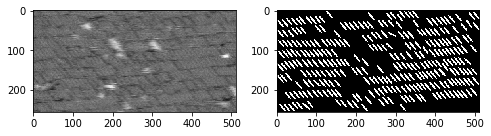

In [0]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,8))
ax1.imshow(imgdata, cmap = 'gray')
ax2.imshow(maskdata_upd[:, :, 0], cmap = 'gray')

Save this processed data as numpy arrays.

In [0]:
savedir = 'drive/Shared drives/CSSAS-ML/training_data'

from google.colab import drive
drive.mount('/content/drive')
np.save(os.path.join(savedir, '3M_KCl_849-image.npy'), imgdata)
np.save(os.path.join(savedir, '3M_KCl_849-mask-updated.npy'),  maskdata_upd)